# Dynamic rupture simulation training: Exercise 1
##### Author: D. Li (d.li@gns.cri.nz)
##### Date: 16th Dec. 2024

This Jupyter Notebook demonstrates a workflow for preparing numerical rupture model and visualizing results. 

The software is open-access package for the numerical simulation of seismic wave phenomena and earthquake dynamics ( https://github.com/SeisSol/SeisSol )
More exercises can be found at https://github.com/SeisSol/Training

## 1. Outline

Dynamic rupture models are physics‐based simulations that couple fracture mechanics to wave propagation and are used to explain specific earthquake observations or to generate a suite of predictions to understand the influence of frictional, geometrical, stress, and material parameters. The objective of this training is to provide a practical guide for students and researchers starting in the field of earthquake dynamics. This guide is timely given the recent growth of computational resources and the range of sophisticated modeling software that are now available.

We will go throught the following steps:

- Docker basis: how to runing code in a container
- Build a model:
  - Generate a mesh using GMSH
  - Prepare input files required for the simulation
- Execute the code
- Visualize the results

TPV 13-3D is a benchmark exercise that is designed to test if computer codes that simulate dynamic earthquake rupture are working as intended (Harris et al., SRL 2018). It was designed by the SCEC/USGS Spontaneous Rupture Code Verification Project and features:

- spontaneous rupture on a 2D planar 60-degree dipping normal fault
- homogeneous half-space: 
- - Density 𝜌=2670 kg/m3
- - Shear-wave velocity 𝑉𝑠=3464 m/s
- - Pressure-wave velocity 𝑉𝑝=6000 m/s
- linear-slip weakening (LSW) friction
- initial stress conditions are depth-dependent and specified everywhere throughout the entire model volume
- prescribed nucleation zone, square, 3 x 3 km in size, locally lower static coefficient of friction
- strongly supershear rupture conditions

![Model geometry](tpv13/tpv13.jpg)

# How to use Docker

- Install Docker desktop in your laptop and launch it
- Invoke SeisSol image by running the command in open Terminal:
```bash
docker pull daisy20170101/seissol-training1:latest
```

- Start Jupyter Notebook by running:
```bash
docker run -p 53155:53155 daisy20170101/seissol-training1:latest
```



## 2. Mesh Generation with GMSH

First, we generate a mesh using GMSH. Ensure GMSH is installed on your system and the `gmsh` command is available in your path.

Below is an example Python script for creating a simple mesh:

In [68]:
# run the command that has been installed in the Docker image

geo_file = 'tpv13/tpv13_training.geo'

!gmsh -3 geo_file

mesh_file = 'tpv13/tpv13_trainning.msh'

!pumgen -s msh4 tpv13/tpv13_training.msh

# if you have successfully installed GMSH (https://gmsh.info/)
# Generate the mesh
# os.system(f'gmsh -3 {geo_file}')

## 3. Input Files Preparation

Prepare the necessary input files for the simulation. The input file format depends on the external code. Below is an example of creating an input file:

In [ ]:
## Look through parameters file
input_file = 'parameters.par'
material_file = 'tpv12_13_material.yaml'
fault_parameter='tpv12_13_fault.ymal'
stress_file = 'tpv12_13_initial_stress.yaml'


## 4. Execute External Code

Run the external code using command lines. Ensure the software is installed and available in your PATH. Replace `external_code` with the actual command.

In [ ]:
# Command to run the external software
# Attention: choose the number of threads according to your laptop 

!OMP_NUM_THREADS=8 mpirun -n 1 SeisSol_Release_dhsw_4_elastic tpv13/parameters.par

## 5. Visualization in ParaView

Once the simulation completes, visualize the results in ParaView. Ensure ParaView is installed and accessible. Load the output files into ParaView for visualization.

['ASl', 'DS', 'Mud', 'PSR', 'P_n', 'Pn0', 'RT', 'SRd', 'SRs', 'Sld', 'Sls', 'StV', 'T_d', 'T_s', 'Td0', 'Ts0', 'Vr', 'fault-tag', 'partition', 'u_n']
['ASl', 'DS', 'Mud', 'PSR', 'P_n', 'Pn0', 'RT', 'SRd', 'SRs', 'Sld', 'Sls', 'StV', 'T_d', 'T_s', 'Td0', 'Ts0', 'Vr', 'fault-tag', 'partition', 'u_n']


/Users/DuoL/opt/miniconda3/envs/obspy/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


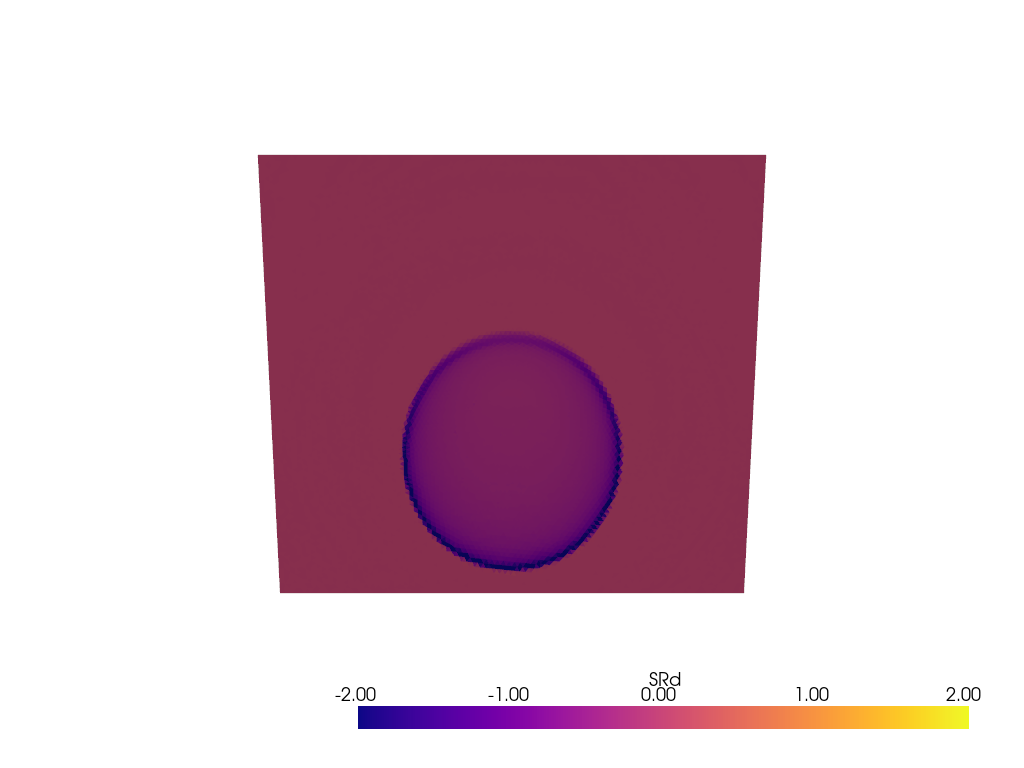

In [67]:
# import pyvista as pv

# Load the XDMF file

rootfolder = 'output/'
xdmf_file = rootfolder + 'tpv13-fault.xdmf'
grid = pv.get_reader(xdmf_file)

# Select a variable to plot\n",
# Plot a specific time step\n",

grid.set_active_time_value(4.0)
print(grid.cell_array_names)

mesh= grid.read()

cscale = [-2,2.0]

# Plot the data with the selected scalar array 
plotter = pv.Plotter()
plotter.add_mesh(mesh, scalars='SRd', show_edges=False,clim=cscale, cmap = 'plasma',show_scalar_bar=True)

# Customize 3D view\n",
plotter.view_vector((1, 1, 1))  # Set the view vector\n",
plotter.camera_position = 'xy'  # Set to XY plane\n",
plotter.camera.zoom(0.9)       # Zoom in\n",

plotter.show()



In [ ]:
# If Paraview installed, load xdmf file automately and check all variable arrays.